<a href="https://colab.research.google.com/github/ebernardino01/DataAnalystPortfolio/blob/main/Clockster/Clockster_Data_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clockster Data Analysis Notebook

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the data from source

In [2]:
# Set no limit on column display
pd.set_option('display.max_columns', None)

In [3]:
# Load attendance.csv
df_att = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1P4u7REFFte05IECi2os6R5tDzmG_7dgx'
)
print(df_att.shape)
df_att.info()

(12635, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     12635 non-null  int64  
 1   first_name  0 non-null      float64
 2   last_name   0 non-null      float64
 3   location    9010 non-null   object 
 4   date        12635 non-null  object 
 5   time        12635 non-null  object 
 6   timezone    12635 non-null  object 
 7   case        12635 non-null  object 
 8   source      12635 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 888.5+ KB


In [4]:
# Load leave_requests.csv
df_lr = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1lmQ7Cks8dSlWWuZOzyuevh1RX74o_LGM'
)
print(df_lr.shape)
df_lr.info()

(51, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     49 non-null     float64
 1   first_name  0 non-null      float64
 2   last_name   0 non-null      float64
 3   type        51 non-null     object 
 4   leave_type  51 non-null     object 
 5   dates       51 non-null     object 
 6   time_start  0 non-null      float64
 7   time_end    0 non-null      float64
 8   timezone    0 non-null      float64
 9   status      51 non-null     object 
 10  created_at  51 non-null     object 
dtypes: float64(6), object(5)
memory usage: 4.5+ KB


In [5]:
# Load payroll.csv
df_pay = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=13veWsjLFOW3ChGVW9jZ-GhCtXApwVEqi'
)
print(df_pay.shape)
df_pay.info()

(348, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 348 non-null    int64  
 1   first_name              0 non-null      float64
 2   last_name               0 non-null      float64
 3   date_start              348 non-null    object 
 4   date_end                348 non-null    object 
 5   ctc                     252 non-null    float64
 6   net_pay                 252 non-null    float64
 7   gross_pay               252 non-null    float64
 8   data_salary_basic_rate  348 non-null    int64  
 9   data_salary_basic_type  348 non-null    object 
 10  currency                252 non-null    object 
 11  status                  348 non-null    object 
 12  created_at              348 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 35.5+ KB


In [6]:
# Load schedules.csv
df_sch = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1RyhgaENGAbAs1X7KPCt4rCunTtPyEcl-'
)
print(df_sch.shape)
df_sch.info()

(4094, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          4094 non-null   object 
 1   dates         4094 non-null   object 
 2   time_start    3041 non-null   object 
 3   time_end      3041 non-null   object 
 4   timezone      3164 non-null   object 
 5   time_planned  4036 non-null   float64
 6   break_time    3017 non-null   float64
 7   leave_type    930 non-null    object 
 8   user_id       4094 non-null   object 
dtypes: float64(2), object(7)
memory usage: 288.0+ KB


In [7]:
# Load users.csv
df_user = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1tfkMfLegCpYzsJ30bo0FZ6HKccNkzrCM'
)
print(df_user.shape)
df_user.info()

(77, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     77 non-null     int64  
 1   first_name  0 non-null      float64
 2   last_name   0 non-null      float64
 3   gender      68 non-null     object 
 4   date_birth  56 non-null     object 
 5   date_hire   39 non-null     object 
 6   date_leave  35 non-null     object 
 7   employment  1 non-null      object 
 8   position    63 non-null     object 
 9   location    77 non-null     object 
 10  department  67 non-null     object 
 11  created_at  77 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.3+ KB


## Data Cleaning and Transformation

In [8]:
# Remove the empty columns
df_att_clean = df_att.loc[:, ~df_att.columns.isin(['first_name', 'last_name'])]
df_lr_clean = df_lr.loc[:, ~df_lr.columns.isin(
    ['first_name', 'last_name', 'time_start', 'time_end', 'timezone']
)]
df_user_clean = df_user.loc[:, ~df_user.columns.isin(
    ['first_name', 'last_name']
)]
df_pay_clean = df_pay.loc[:, ~df_pay.columns.isin(['first_name', 'last_name'])]

In [9]:
# Clean columns in users dataframe
df_user_clean = df_user_clean.copy()
df_user_clean['gender'] = df_user_clean['gender'].str.title()
df_user_clean['employment'] = df_user_clean['employment'].str.title()
df_user_clean['employment'].replace('_', ' ', regex=True, inplace=True)

df_user_fill_values = {
    'position': 'None',
    'location': 'None',
    'department': 'None',
    'date_birth': pd.NaT,
    'date_hire': pd.NaT,
    'date_leave': pd.NaT,
    'gender': 'Other',
    'employment': 'Full Time'
}
df_user_clean.fillna(value=df_user_fill_values, inplace=True)
df_user_clean

<ipython-input-9-d25162e2745c>:17: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_user_clean.fillna(value=df_user_fill_values, inplace=True)


,user_id,gender,date_birth,date_hire,date_leave,employment,position,location,department,created_at
0,74008,Other,NaT,NaT,NaT,Full Time,None,Office,Support Centre,2021-10-20 11:15:49
1,74025,Female,1982-04-21,NaT,NaT,Full Time,Legal Officer,Office,Support Centre,2021-10-20 12:08:05
2,74027,Female,1992-05-12,2021-07-01,NaT,Full Time,General Manager,Office,Support Centre,2021-10-20 12:10:37
3,74042,Female,1991-01-10,2021-11-01,2022-10-31,Full Time,Warehouse Officer - Purchasing,Office,Support Centre,2021-10-20 14:22:52
4,74044,Male,1991-12-24,2019-01-04,2022-03-30,Full Time,Dokter,Clinic,Medical,2021-10-20 14:22:52
...,...,...,...,...,...,...,...,...,...,...
72,157837,Female,NaT,NaT,NaT,Full Time,Admin Bisnis,Office,None,2022-10-03 01:34:19
73,157916,Other,NaT,NaT,NaT,Full Time,None,Clinic,None,2022-10-03 05:59:38
74,159207,Other,NaT,NaT,NaT,Full Time,None,Office,None,2022-10-10 08:43:38
75,159217,Other,NaT,NaT,NaT,Full Time,None,Nu Orange,None,2022-10-10 09:29:51


In [10]:
# Clean columns in payroll dataframe
df_pay_clean = df_pay_clean.copy()
df_pay_clean['data_salary_basic_type'] = \
    df_pay['data_salary_basic_type'].str.title()
df_pay_clean['status'] = df_pay['status'].str.title()

df_pay_fill_values = {
    'ctc': 0,
    'net_pay': 0,
    'gross_pay': 0,
    'currency': 'IDR',
    'employment': 'Full Time'
}
df_pay_clean.fillna(value=df_pay_fill_values, inplace=True)
df_pay_clean

,user_id,date_start,date_end,ctc,net_pay,gross_pay,data_salary_basic_rate,data_salary_basic_type,currency,status,created_at
0,74042,2021-12-01,2021-12-31,2804051.0,2804051.0,2804051.0,2500000,Monthly,IDR,Approved,2021-12-28 04:08:14
1,74053,2021-12-01,2021-12-31,3975805.0,3975805.0,3975805.0,3500000,Monthly,IDR,Approved,2021-12-28 05:39:43
2,74052,2021-12-01,2021-12-31,1820000.0,1820000.0,1820000.0,1800000,Monthly,IDR,Approved,2022-01-04 04:45:38
3,75963,2021-12-01,2021-12-31,292500.0,292500.0,292500.0,90000,Daily,IDR,Approved,2022-01-04 04:54:28
4,83884,2021-12-01,2021-12-31,600000.0,600000.0,600000.0,3000000,Monthly,IDR,Approved,2022-01-04 04:55:59
...,...,...,...,...,...,...,...,...,...,...,...
343,155509,2022-09-01,2022-09-30,0.0,0.0,0.0,1800000,Monthly,IDR,Approved,2022-10-07 04:39:47
344,88357,2022-09-01,2022-09-30,0.0,0.0,0.0,1920000,Monthly,IDR,Approved,2022-10-07 04:43:43
345,125744,2022-09-01,2022-09-30,0.0,0.0,0.0,120000,Daily,IDR,Approved,2022-10-07 04:55:48
346,75963,2022-09-01,2022-09-30,0.0,0.0,0.0,120000,Daily,IDR,Approved,2022-10-07 04:57:23


In [11]:
# Clean and transform leave_requests dataframe
df_lr_clean = df_lr_clean.copy()
df_lr_clean['type'] = df_lr_clean['type'].str.title()
df_lr_clean['leave_type'] = df_lr_clean['leave_type'].str.title()
df_lr_clean['leave_type'].replace('_', ' ', regex=True, inplace=True)
df_lr_clean['status'] = df_lr_clean['status'].str.title()

# Split the dates column into rows
print(f'shape before explode: {df_lr_clean.shape}')
df_lr_clean['dates'] = \
    df_lr_clean['dates'].str.strip('[]').str.replace('\'', '').str.split(', ')
df_lr_clean = df_lr_clean.explode('dates').drop_duplicates()

# Reset the index
df_lr_clean = df_lr_clean.reset_index(drop=True)

# Convert the string of dates into date format
df_lr_clean['date'] = pd.to_datetime(
    df_lr_clean['dates'],
    format='"%Y-%m-%d"'
).dt.date
df_lr_clean = df_lr_clean.drop(columns=['dates'])

print(f'shape after explode: {df_lr_clean.shape}')
df_lr_clean

shape before explode: (51, 6)
shape after explode: (92, 6)


,user_id,type,leave_type,status,created_at,date
0,NaN,Leave,Day Off,Accepted,2021-10-25 12:38:59,2021-10-27
1,NaN,Leave,Day Off,Accepted,2021-11-07 15:20:46,2021-11-12
2,74465.0,Leave,Unpaid,Accepted,2021-11-15 13:45:33,2021-11-16
3,75839.0,Leave,Day Off,Accepted,2021-11-16 02:18:10,2021-11-24
4,74042.0,Leave,Day Off,Accepted,2021-11-27 07:06:41,2021-11-28
...,...,...,...,...,...,...
87,74052.0,Leave,Compensatory,Accepted,2022-10-06 07:04:06,2022-10-09
88,74049.0,Leave,Compensatory,Accepted,2022-10-08 00:35:32,2022-10-14
89,83884.0,Leave,Compensatory,Accepted,2022-10-13 09:23:12,2022-10-22
90,83884.0,Leave,Compensatory,Accepted,2022-10-13 09:23:12,2022-10-23


In [12]:
# Clean and transform schedules dataframe
df_sch_clean = df_sch.copy()
df_sch_clean['type'] = df_sch_clean['type'].str.title()
df_sch_clean['leave_type'] = df_sch_clean['leave_type'].str.title()
df_sch_clean['leave_type'].replace('_', ' ', regex=True, inplace=True)

df_sch_fill_values = {
    'time_planned': 0,
    'break_time': 0,
    'leave_type': 'None',
    'time_start': pd.NaT,
    'time_end': pd.NaT
}
df_sch_clean.fillna(value=df_sch_fill_values, inplace=True)

# Convert the times into time format
df_sch_clean['time_start'] = pd.to_datetime(
    df_sch_clean['time_start'],
    format='%H:%M:%S'
).dt.time
df_sch_clean['time_end'] = pd.to_datetime(
    df_sch_clean['time_end'],
    format='%H:%M:%S'
).dt.time

# Split the user_id column into rows
print(f'shape before 1st explode: {df_sch_clean.shape}')
df_sch_clean['user_id'] = \
    df_sch_clean['user_id'].str.strip('{}').str.split(',')
df_sch_clean = df_sch_clean.explode('user_id').drop_duplicates()
print(f'shape after 1st explode: {df_sch_clean.shape}')

# Convert the user_id into int64 format
df_sch_clean['user_id'] = pd.to_numeric(df_sch_clean['user_id'])

# Split the dates column into rows
print(f'shape before 2nd explode: {df_sch_clean.shape}')
df_sch_clean['dates'] = \
    df_sch_clean['dates'].str.strip('[]').str.replace('\'', '').str.split(', ')
df_sch_clean = df_sch_clean.explode('dates').drop_duplicates()

# Convert the string of dates into date format
df_sch_clean['date'] = pd.to_datetime(
    df_sch_clean['dates'],
    format='"%Y-%m-%d"'
).dt.date

# Drop the previous dates column in favor of the transformed column
df_sch_clean = df_sch_clean.drop(columns=['dates'])

# Reset the index
df_sch_clean = df_sch_clean.reset_index(drop=True)
print(f'shape after 2nd explode: {df_sch_clean.shape}')
df_sch_clean

shape before 1st explode: (4094, 9)
shape after 1st explode: (3999, 9)
shape before 2nd explode: (3999, 9)
shape after 2nd explode: (26130, 9)


,type,time_start,time_end,timezone,time_planned,break_time,leave_type,user_id,date
0,Free,09:00:00,08:59:00,+08:00,7200.0,0.0,None,74138,2021-10-01
1,Free,09:00:00,08:59:00,+08:00,7200.0,0.0,None,74138,2021-10-02
2,Free,09:00:00,08:59:00,+08:00,7200.0,0.0,None,74138,2021-10-04
3,Free,09:00:00,08:59:00,+08:00,7200.0,0.0,None,74138,2021-10-05
4,Free,09:00:00,08:59:00,+08:00,7200.0,0.0,None,74138,2021-10-06
...,...,...,...,...,...,...,...,...,...
26125,Work,15:00:00,22:00:00,+08:00,25200.0,0.0,None,120666,2022-10-24
26126,Work,08:00:00,15:00:00,+08:00,25200.0,0.0,None,120696,2022-10-24
26127,Work,08:00:00,15:00:00,+08:00,25140.0,60.0,None,120696,2022-10-21
26128,Fake,NaT,NaT,+06:00,0.0,0.0,None,74465,2022-10-21


In [13]:
# Clean and transform attendance dataframe
df_att_clean = df_att_clean.copy()
df_att_clean['source'] = df_att_clean['source'].str.title()
df_att_clean['location'].fillna('None', inplace=True)
df_att_clean['date'] = pd.to_datetime(
    df_att_clean['date'],
    format='%Y-%m-%d'
).dt.date

print(f'shape before transform: {df_att_clean.shape}')
group_cols = ['user_id', 'location', 'date', 'timezone', 'source']

# Filter IN records and group by user_id, location, date, timezone, and source,
# then get the minimum time for each group and rename the time column
login = \
    df_att_clean[
        df_att_clean['case'] == 'IN'
    ].groupby(group_cols)['time'].min().rename('login_time').reset_index()

# Filter OUT records and group by user_id, location, date, timezone, and source,
# then get the maximum time for each group and rename the time column
logout = \
    df_att_clean[
        df_att_clean['case'] == 'OUT'
    ].groupby(group_cols)['time'].max().rename('logout_time').reset_index()

# Join the login and logout DataFrames
join_cols = ['user_id', 'date']
login_logout = pd.merge(
    login,
    logout,
    on=join_cols,
    how='left',
    suffixes=('_in', '_out')
)

# Fill the missing values
login_logout['logout_time'] = login_logout['logout_time'].fillna(pd.NaT)
login_logout['location_out'] = login_logout['location_out'].fillna('None')
login_logout['timezone_out'] = login_logout['timezone_out'].fillna('None')
login_logout['source_out'] = login_logout['source_out'].fillna('None')

# Convert the times into time format
login_logout['login_time'] = pd.to_datetime(
    login_logout['login_time'],
    format='%H:%M:%S'
).dt.time
login_logout['logout_time'] = pd.to_datetime(
    login_logout['logout_time'],
    format='%H:%M:%S'
).dt.time

# Sort the result by user_id, log_date, and login_time
login_logout = login_logout.sort_values(['user_id', 'date', 'login_time'])

# Reset the index
login_logout = login_logout.reset_index(drop=True)
df_att_clean = login_logout.copy()
print(f'shape after transform: {df_att_clean.shape}')
df_att_clean

shape before transform: (12635, 7)
shape after transform: (6225, 10)


,user_id,location_in,date,timezone_in,source_in,login_time,location_out,timezone_out,source_out,logout_time
0,74025,None,2021-10-20,+08:00,Mobile,20:08:45,None,None,None,NaT
1,74025,Nu Orange,2021-10-21,+08:00,Mobile,13:22:20,None,None,None,NaT
2,74025,Nu Orange,2021-10-22,+08:00,Mobile,13:40:57,None,None,None,NaT
3,74025,None,2021-10-25,+08:00,Mobile,15:19:16,None,None,None,NaT
4,74025,None,2021-10-26,+08:00,Mobile,10:25:07,None,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...
6220,159217,Nu Orange,2022-10-15,+08:00,Mobile,07:59:23,Nu Orange,+08:00,Mobile,15:01:48
6221,159217,Nu Orange,2022-10-18,+08:00,Mobile,08:04:23,Nu Orange,+08:00,Mobile,15:04:06
6222,160306,Nu Orange,2022-10-17,+08:00,Mobile,07:40:34,Nu Orange,+08:00,Mobile,15:07:18
6223,160306,Nu Orange,2022-10-18,+08:00,Mobile,14:46:30,None,None,None,NaT


## Data Calculations

In [14]:
# Produce the schedules-attendance-users joined dataframe
join_cols = ['user_id', 'date']
sch_clean_cols = [
    'user_id',
    'date',
    'type',
    'time_start',
    'time_end',
    'time_planned',
    'break_time'
]
att_clean_cols = ['user_id', 'date', 'login_time', 'logout_time']
user_clean_cols = ['user_id', 'gender', 'position', 'department']

# Merge schedules with attendance
sch_att = pd.merge(
    df_sch_clean[sch_clean_cols],
    df_att_clean[att_clean_cols],
    on=join_cols,
    how='left'
)

# Filter initial merge by date range from attendance
sch_att = sch_att[
    (sch_att['date'] >= df_att_clean['date'].min()) &
    (sch_att['date'] <= df_att_clean['date'].max())
]

# Merge with users
sch_att_user = pd.merge(
    sch_att,
    df_user_clean[user_clean_cols],
    on=['user_id'],
    how='inner'
)

# Replace NaT values with a default time value
default_time = pd.to_datetime('00:00:00').time()
sch_att_user['login_time'] = sch_att_user['login_time'].fillna(default_time)
sch_att_user['time_start'] = sch_att_user['time_start'].fillna(default_time)
sch_att_user['logout_time'] = sch_att_user['logout_time'].fillna(default_time)
sch_att_user['time_end'] = sch_att_user['time_end'].fillna(default_time)

# Concatenate date and time for calculations
sch_att_user['login_datetime'] = pd.to_datetime(
    sch_att_user['date'].astype(str) + ' ' +
    sch_att_user['login_time'].astype(str)
)
sch_att_user['datetime_start'] = pd.to_datetime(
    sch_att_user['date'].astype(str) + ' ' +
    sch_att_user['time_start'].astype(str)
)
sch_att_user['logout_datetime'] = pd.to_datetime(
    sch_att_user['date'].astype(str) + ' ' +
    sch_att_user['logout_time'].astype(str)
)
sch_att_user['datetime_end'] = pd.to_datetime(
    sch_att_user['date'].astype(str) + ' ' +
    sch_att_user['time_end'].astype(str)
)

# Remove the concatenated columns
drop_cols = ['date', 'login_time', 'time_start', 'logout_time', 'time_end']
sch_att_user = sch_att_user.drop(columns=drop_cols)

# Add calculation columns
sch_att_user['login_diff'] = (
    sch_att_user['login_datetime'] - sch_att_user['datetime_start']
).astype('timedelta64[m]')
sch_att_user['logout_diff'] = (
    sch_att_user['logout_datetime'] - sch_att_user['datetime_end']
).astype('timedelta64[m]')

# Add conditional columns
sch_att_user['is_tardy'] = np.where(
    (sch_att_user['login_diff'] > 10) &
    (sch_att_user['login_diff'] <= 120) &
    (sch_att_user['type'] == 'Work'),
    True,
    False
)
sch_att_user['is_undertime'] = np.where(
    (sch_att_user['logout_datetime'].dt.time != default_time) &
    (sch_att_user['logout_diff'] < 0) &
    (sch_att_user['logout_diff'] >= -120) &
    (sch_att_user['type'] == 'Work'),
    True,
    False
)
sch_att_user['no_work_logout'] = np.where(
    (sch_att_user['login_datetime'].dt.time != default_time) &
    (sch_att_user['logout_datetime'].dt.time == default_time) &
    (sch_att_user['type'] == 'Work'),
    True,
    False
)

sch_att_user

,user_id,type,time_planned,break_time,gender,position,department,login_datetime,datetime_start,logout_datetime,datetime_end,login_diff,logout_diff,is_tardy,is_undertime,no_work_logout
0,74138,Free,7200.0,0.0,Female,Finance & Accounting,Support Centre,2021-10-20 00:00:00,2021-10-20 09:00:00,2021-10-20 00:00:00,2021-10-20 08:59:00,-540.0,-539.0,False,False,False
1,74138,Free,7200.0,0.0,Female,Finance & Accounting,Support Centre,2021-10-21 00:00:00,2021-10-21 09:00:00,2021-10-21 00:00:00,2021-10-21 08:59:00,-540.0,-539.0,False,False,False
2,74138,Free,7200.0,0.0,Female,Finance & Accounting,Support Centre,2021-10-22 14:33:25,2021-10-22 09:00:00,2021-10-22 00:00:00,2021-10-22 08:59:00,333.0,-539.0,False,False,False
3,74138,Free,7200.0,0.0,Female,Finance & Accounting,Support Centre,2021-10-23 00:00:00,2021-10-23 09:00:00,2021-10-23 00:00:00,2021-10-23 08:59:00,-540.0,-539.0,False,False,False
4,74138,Free,7200.0,0.0,Female,Finance & Accounting,Support Centre,2021-10-25 00:00:00,2021-10-25 09:00:00,2021-10-25 00:00:00,2021-10-25 08:59:00,-540.0,-539.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18883,90377,Leave,0.0,0.0,Female,None,Support Centre,2022-10-09 00:00:00,2022-10-09 00:00:00,2022-10-09 00:00:00,2022-10-09 00:00:00,0.0,0.0,False,False,False
18884,90377,Leave,0.0,0.0,Female,None,Support Centre,2022-10-15 07:04:26,2022-10-15 00:00:00,2022-10-15 16:44:48,2022-10-15 00:00:00,424.0,1004.0,False,False,False
18885,90377,Leave,0.0,0.0,Female,None,Support Centre,2022-10-16 00:00:00,2022-10-16 00:00:00,2022-10-16 00:00:00,2022-10-16 00:00:00,0.0,0.0,False,False,False
18886,90377,Work,32400.0,0.0,Female,None,Support Centre,2022-10-08 07:23:01,2022-10-08 08:00:00,2022-10-08 20:03:23,2022-10-08 17:00:00,-37.0,183.0,False,False,False


In [15]:
# Get tardiness by employee
emp_cols = ['user_id', 'position']
tardy_by_emp = \
    sch_att_user.query(
        'is_tardy == True'
    ).groupby(emp_cols)['is_tardy'].count().reset_index()
tardy_by_emp = tardy_by_emp.sort_values(by='is_tardy', ascending=False)
tardy_by_emp = tardy_by_emp.rename(
    columns={'is_tardy': 'tardiness_count'}
)
tardy_by_emp.head(10).style.hide(axis='index')

user_id,position,tardiness_count
74639,Asisten Apoteker,42
74054,Asisten Apoteker,41
128325,None,36
87864,Dokter,22
88357,Warehouse Staff,21
79765,Perawat,19
83902,Personal Assistance,19
92930,Asisten Apoteker,17
79738,Perawat,16
88348,Admin Bisnis,14


In [16]:
# Get tardiness by department
tardy_by_dept = \
    sch_att_user.query(
        'is_tardy == True'
    ).groupby(['department'])['is_tardy'].count().reset_index()
tardy_by_dept = tardy_by_dept.sort_values(by='is_tardy', ascending=False)
tardy_by_dept = tardy_by_dept.rename(
    columns={'is_tardy': 'tardiness_count'}
)
tardy_by_dept.style.hide(axis='index')

department,tardiness_count
Medical,142
Pharmacy,136
Support Centre,68
PBF,58
None,13


In [17]:
# Get undertimes by employee
emp_cols = ['user_id', 'position']
undertime_by_emp = \
    sch_att_user.query(
        'is_undertime == True'
    ).groupby(emp_cols)['is_undertime'].count().reset_index()
undertime_by_emp = \
    undertime_by_emp.sort_values(
        by='is_undertime',
        ascending=False
    )
undertime_by_emp = undertime_by_emp.rename(
    columns={'is_undertime': 'undertime_count'}
)
undertime_by_emp.head(10).style.hide(axis='index')

user_id,position,undertime_count
74465,Asisten Apoteker,27
83888,Asisten Apoteker,27
74054,Asisten Apoteker,23
92930,Asisten Apoteker,20
75218,IT Spv,17
90377,None,11
74050,Perawat,10
155509,Warehouse Staff,9
128325,None,8
159207,None,7


In [18]:
# Get undertime by department
undertime_by_dept = \
    sch_att_user.query(
        'is_undertime == True'
    ).groupby(['department'])['is_undertime'].count().reset_index()
undertime_by_dept = \
    undertime_by_dept.sort_values(
        by='is_undertime',
        ascending=False
    )
undertime_by_dept = undertime_by_dept.rename(
    columns={'is_undertime': 'undertime_count'}
)
undertime_by_dept.style.hide(axis='index')

department,undertime_count
Pharmacy,102
Support Centre,39
Medical,30
PBF,18
None,10


In [19]:
# Get tardiness by month of year
sch_att_user['month'] = sch_att_user['login_datetime'].dt.strftime('%b')
tardy_by_month = \
    sch_att_user.query(
        'is_tardy == True'
    ).groupby(['month'])['is_tardy'].count().reset_index()

# Convert month string into index then sort
tardy_by_month['index'] = pd.DatetimeIndex(
    pd.to_datetime(
        tardy_by_month['month'],
        format='%b'
    )
).month
tardy_by_month = tardy_by_month.set_index('index').sort_index()
tardy_by_month = tardy_by_month.rename(
    columns={'is_tardy': 'tardiness_count'}
)
tardy_by_month.style.hide(axis='index')

month,tardiness_count
Jan,31
Feb,41
Mar,32
Apr,37
May,29
Jun,33
Jul,56
Aug,14
Sep,41
Oct,35


In [20]:
# Get tardiness by day of week
sch_att_user['day'] = sch_att_user['login_datetime'].dt.strftime('%a')
tardy_by_day = \
    sch_att_user.query(
        'is_tardy == True'
    ).groupby(['day'])['is_tardy'].count().reset_index()

# Convert day string into index then sort
day_cat = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tardy_by_day['index'] = pd.Categorical(
    tardy_by_day['day'],
    categories=day_cat,
    ordered=True
)
tardy_by_day = tardy_by_day.set_index('index').sort_index()
tardy_by_day = tardy_by_day.rename(
    columns={'is_tardy': 'tardiness_count'}
)
tardy_by_day.style.hide(axis='index')

day,tardiness_count
Mon,68
Tue,65
Wed,57
Thu,74
Fri,73
Sat,44
Sun,36


In [21]:
# Produce the schedules-leave_requests-users joined dataframe
join_cols = ['user_id', 'date', 'type']
sch_clean_cols = ['user_id', 'date', 'type', 'leave_type']
lr_clean_cols = ['user_id', 'date', 'type', 'status']
user_clean_cols = ['user_id', 'gender', 'position', 'department']

# Merge schedules with leave_requests
sch_lr = pd.merge(
    df_sch_clean[sch_clean_cols],
    df_lr_clean[lr_clean_cols],
    on=join_cols,
    how='inner'
)

# Filter initial merge by leave_request date range and type
sch_lr = sch_lr[
    (sch_lr['type'] == 'Leave')
]

# Merge with users
sch_lr_user = pd.merge(
    sch_lr,
    df_user_clean[user_clean_cols],
    on=['user_id'],
    how='inner'
)

sch_lr_user

,user_id,date,type,leave_type,status,gender,position,department
0,74465,2021-11-16,Leave,Unpaid,Accepted,Female,Asisten Apoteker,Pharmacy
1,75839,2021-11-24,Leave,Day Off,Accepted,Female,Dokter,Medical
2,74042,2021-11-28,Leave,Day Off,Accepted,Female,Warehouse Officer - Purchasing,Support Centre
3,74042,2022-03-11,Leave,Annual,Accepted,Female,Warehouse Officer - Purchasing,Support Centre
4,74042,2022-06-28,Leave,Compensatory,Accepted,Female,Warehouse Officer - Purchasing,Support Centre
...,...,...,...,...,...,...,...,...
88,74556,2022-09-02,Leave,Annual,Accepted,Female,Asisten Apoteker,Pharmacy
89,74556,2022-09-03,Leave,Annual,Accepted,Female,Asisten Apoteker,Pharmacy
90,74556,2022-09-04,Leave,Annual,Accepted,Female,Asisten Apoteker,Pharmacy
91,83884,2022-10-22,Leave,Compensatory,Accepted,Female,Apoteker,Pharmacy


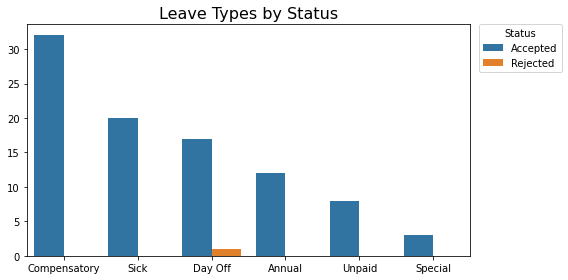

In [22]:
# Get leave type stats
group_cols = ['leave_type', 'status']
leaves_by_type = \
    sch_lr_user.groupby(group_cols)['type'].count().reset_index()

leaves_by_type = leaves_by_type.rename(
    columns={'type': 'count'}
)
leaves_by_type = \
    leaves_by_type.sort_values(
        by='count',
        ascending=False
    )

# Generate bar plot
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(
    data=leaves_by_type,
    x='leave_type',
    y='count',
    hue='status',
    ax=ax
)
ax.set_title(
    "Leave Types by Status",
    fontsize=16
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Status',
    borderaxespad=0
)
plt.tight_layout()
plt.show()

In [23]:
# Get leaves by month of year
sch_lr_user['datetime'] = pd.to_datetime(
    sch_lr_user['date'].astype(str) + ' 00:00:00'
)

sch_lr_user['month'] = sch_lr_user['datetime'].dt.strftime('%b')
leaves_by_month = \
    sch_lr_user.groupby(['month'])['leave_type'].count().reset_index()

# Convert month string into index then sort
leaves_by_month['index'] = pd.DatetimeIndex(
    pd.to_datetime(
        leaves_by_month['month'],
        format='%b'
    )
).month
leaves_by_month = leaves_by_month.set_index('index').sort_index()
leaves_by_month = leaves_by_month.rename(
    columns={'leave_type': 'leave_count'}
)
leaves_by_month.style.hide(axis='index')

month,leave_count
Jan,2
Mar,1
Jun,22
Jul,7
Aug,21
Sep,22
Oct,7
Nov,3
Dec,8


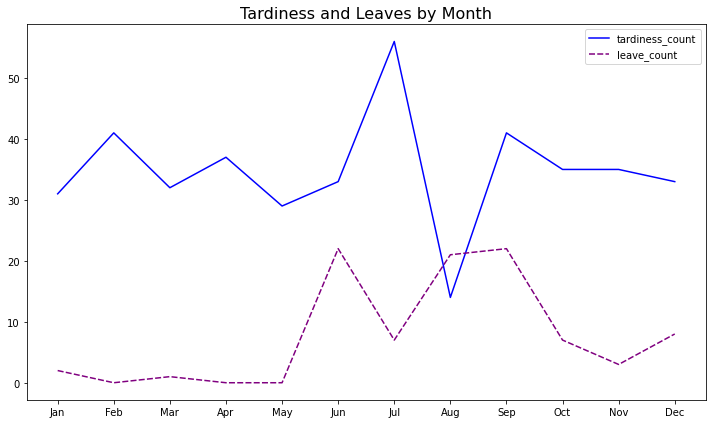

In [24]:
# Merge tardiness and leaves by month
tardiness_leaves_month = pd.merge(
    tardy_by_month,
    leaves_by_month,
    on=['month'],
    how='left'
).fillna(0)
tardiness_leaves_month = tardiness_leaves_month.set_index('month')

# Plot the tardiness and leaves trend
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(
    data=tardiness_leaves_month,
    palette=['blue', 'purple'],
    ax=ax
)
ax.set_title(
    "Tardiness and Leaves by Month",
    fontsize=16
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [25]:
# Get leaves by day of week
sch_lr_user['day'] = sch_lr_user['datetime'].dt.strftime('%a')
leaves_by_day = \
    sch_lr_user.groupby(['day'])['leave_type'].count().reset_index()

# Convert day string into index then sort
day_cat = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
leaves_by_day['index'] = pd.Categorical(
    leaves_by_day['day'],
    categories=day_cat,
    ordered=True
)
leaves_by_day = leaves_by_day.set_index('index').sort_index()
leaves_by_day = leaves_by_day.rename(
    columns={'leave_type': 'leave_count'}
)
leaves_by_day.style.hide(axis='index')

day,leave_count
Mon,9
Tue,17
Wed,13
Thu,12
Fri,15
Sat,14
Sun,13


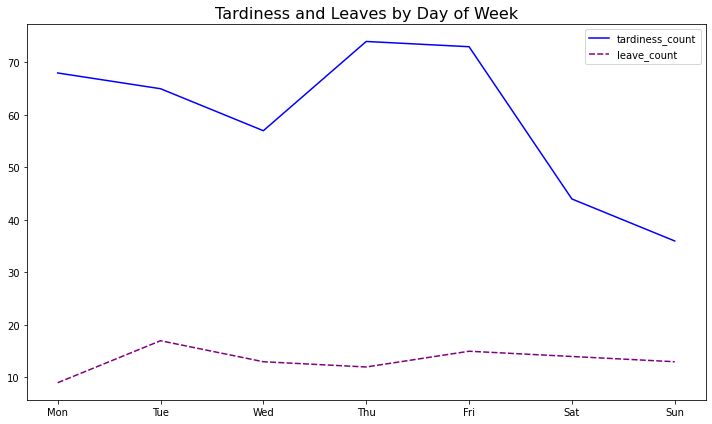

In [26]:
# Merge tardiness and leaves by day of week
tardiness_leaves_day = pd.merge(
    tardy_by_day,
    leaves_by_day,
    on=['day'],
    how='left'
).fillna(0)
tardiness_leaves_day = tardiness_leaves_day.set_index('day')

# Plot the tardiness and leaves trend
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(
    data=tardiness_leaves_day,
    palette=['blue', 'purple'],
    ax=ax
)
ax.set_title(
    "Tardiness and Leaves by Day of Week",
    fontsize=16
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [27]:
# Add calculations for work time
sch_att_user['actual_time'] = (
    sch_att_user['logout_datetime'] - sch_att_user['login_datetime']
).astype('timedelta64[s]')

# Compare average plan and actual times for each employee
emp_cols = ['user_id', 'department', 'position', 'gender']
actual_worktime_by_emp = \
    sch_att_user.groupby(emp_cols).agg(
        time_planned=('time_planned', np.mean),
        actual_time=('actual_time', np.mean)
    ).reset_index().round(2)
actual_worktime_by_emp = \
    actual_worktime_by_emp.sort_values(
        by='actual_time',
        ascending=False
    )
actual_worktime_by_emp.head(10).style.hide(axis='index')

user_id,department,position,gender,time_planned,actual_time
87864,Medical,Dokter,Female,25417.740000,26211.880000
75952,Support Centre,Purchasing,Female,20731.030000,26005.510000
74042,Support Centre,Warehouse Officer - Purchasing,Female,23312.700000,24117.900000
83885,Pharmacy,Apoteker,Female,22181.250000,22912.740000
120666,Pharmacy,Apoteker,Female,21800.930000,22577.710000
83884,Pharmacy,Apoteker,Female,20331.230000,22261.960000
74461,Pharmacy,Apoteker,Female,20536.680000,21461.130000
74052,Medical,Bidan,Female,21559.520000,21236.020000
74556,Pharmacy,Asisten Apoteker,Female,20595.160000,21230.270000
83902,Support Centre,Personal Assistance,Female,22620.380000,21075.860000


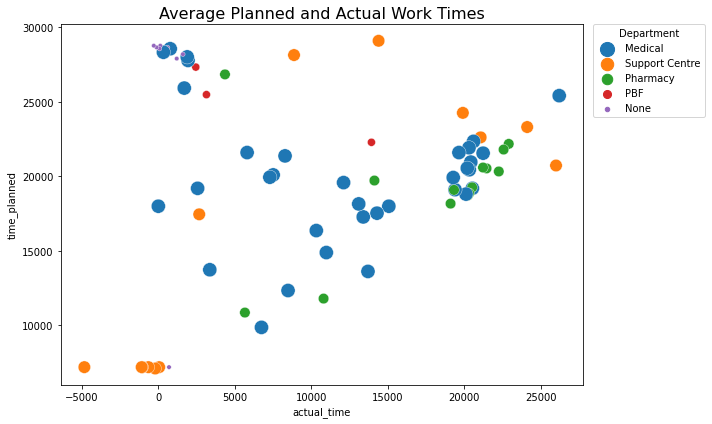

In [28]:
# Generate scatter plot of planned vs actual times
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(
    data=actual_worktime_by_emp,
    x='actual_time',
    y='time_planned',
    hue='department',
    size='department',
    sizes=(20, 200),
    ax=ax
)
ax.set_title(
    "Average Planned and Actual Work Times",
    fontsize=16
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Department',
    borderaxespad=0
)
plt.tight_layout()
plt.show()

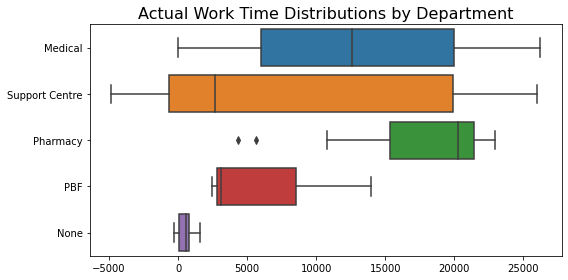

In [29]:
# Generate box plot to show average actual time distributions by department
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(
    data=actual_worktime_by_emp,
    x='actual_time',
    y='department',
    ax=ax
)
ax.set_title(
    "Actual Work Time Distributions by Department",
    fontsize=16
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

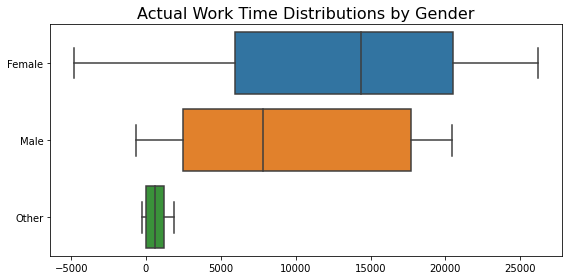

In [30]:
# Generate box plot to show average actual time distributions by gender
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(
    data=actual_worktime_by_emp,
    x='actual_time',
    y='gender',
    ax=ax
)
ax.set_title(
    "Actual Work Time Distributions by Gender",
    fontsize=16
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()